# Introducción a la visualización con matplotlib

_Después de estudiar la sintaxis de Python y empezar a manejar datos numéricos, ha llegado el momento de visualizarlos. Con la biblioteca **matplotlib** podemos crear gráficos de muy alta calidad y altamente personalizables._

## ¿Qué es matplotlib?

* Estándar para visualización en Python
* Pretende ser similar a las funciones de visualización de MATLAB
* Diferentes formas de usarla: interfaz `pyplot` y orientada a objetos

En primer lugar, vamos a importar los paquetes necesarios para trabajar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

La biblioteca matplotlib es gigantesca y es difícil hacerse una idea global de todas sus posibilidades en una primera toma de contacto. Es recomendable tener a mano la documentación y la [galería](http://matplotlib.org/gallery.html#pylab_examples):

In [7]:
from IPython.display import HTML
HTML('<iframe src="http://matplotlib.org/gallery.html#pylab_examples" width="800" height="600"></iframe>')

Si hacemos clic en cualquiera de las imágenes, accedemos al código fuente que la ha generado, por ejemplo [annotation demo](http://matplotlib.org/examples/pylab_examples/annotation_demo.html):

In [8]:
HTML('<iframe src="http://matplotlib.org/examples/pylab_examples/annotation_demo.html" width="800" height="600"></iframe>')

## Interfaz pyplot

La interfaz `pyplot` proporciona una serie de funciones que operan sobre un *estado global* - es decir, nosotros **no** especificamos sobre qué gráfica o ejes estamos actuando. Es una forma rápida y cómoda de crear gráficas pero perdemos parte del control.

### Función `plot`

El paquete `pyplot` se suele importar bajo el alias `plt`, de modo que todas las funciones se acceden a través de `plt.<funcion>`. La función más básica es la función `plot`:

In [2]:
plt

<module 'matplotlib.pyplot' from '/home/ale/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

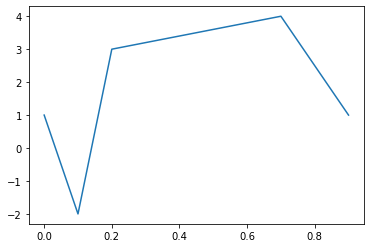

In [3]:
plt.plot([0.0, 0.1, 0.2, 0.7, 0.9], [1, -2, 3, 4, 1])

La función `plot` recibe una sola lista (si queremos especificar los valores *y*) o dos listas (si especificamos *x* e *y*). Naturalmente si especificamos dos listas ambas tienen que tener la misma longitud.

La tarea más habitual a la hora de trabajar con matplotlib es representar una función. Para ello tendremos que definir un dominio y evaluarla en dicho dominio. Por ejemplo:

$$ f(x) = e^{-x^2} $$

In [13]:
def f(x):
    return np.exp(-x ** 2)

def untref(x):
    return 5.0**(-x ** 2)


untref(7.5)

4.818781741279114e-40

Definimos el dominio con la función `np.linspace`, que crea un vector de puntos equiespaciados:

In [14]:
x = np.linspace(-1, 3, 100)

Y representamos la función:

Text(0.5, 1.0, 'Función $f(x)$')

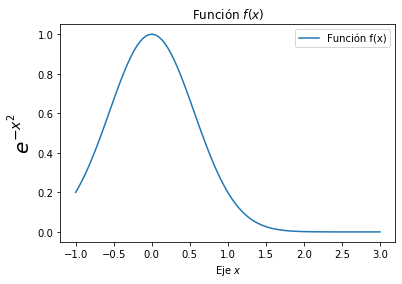

In [18]:
plt.plot(x, untref(x), label="Función f(x)")
plt.xlabel("Eje $x$")
plt.ylabel("$e^{-x^2}$",fontsize=20)
plt.legend()
plt.title("Función $f(x)$")

Notamos varios aspectos:

* Con diversas llamadas a funciones dentro de `plt.` se actualiza el gráfico *actual*. Esa es la forma de trabajar con la interfaz pyplot.
* Podemos añadir etiquetas, y escribir $\LaTeX$ en ellas. Tan solo hay que encerrarlo entre signos $$.
* Añadiendo como argumento `label` podemos definir una leyenda.

### Personalización

La función `plot` acepta una serie de argumentos para personalizar el aspecto de la función. Con una letra podemos especificar el color, y con un símbolo el tipo de línea.

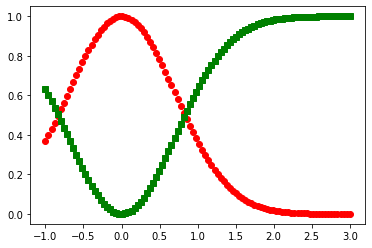

In [22]:
plt.plot(x, f(x), 'ro')
plt.plot(x, 1 - f(x), 'gs')

Esto en realidad son códigos abreviados, que se corresponden con argumentos de la función `plot`:

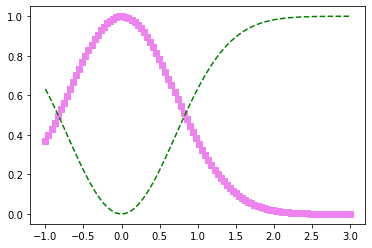

In [24]:
plt.plot(x, f(x), color='violet', linestyle='', marker='s')
plt.plot(x, 1 - f(x), c='g', ls='--')

La lista de posibles argumentos y abreviaturas está disponible en la documentación de la [función `plot`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

### Mayor personalización

Desde matplotlib 1.4 se puede manipular fácilmente la apariencia de la gráfica usando **estilos**. Para ver qué estilos hay disponibles, escribimos `plt.style.available`.

In [25]:
plt.style.available

['classic',
 'seaborn-bright',
 'seaborn-pastel',
 'fast',
 'grayscale',
 'seaborn-dark-palette',
 'ggplot',
 'seaborn-muted',
 'seaborn-colorblind',
 'seaborn-white',
 'seaborn-notebook',
 'seaborn-poster',
 'fivethirtyeight',
 'seaborn-deep',
 'seaborn-paper',
 'Solarize_Light2',
 'seaborn',
 'dark_background',
 '_classic_test',
 'bmh',
 'tableau-colorblind10',
 'seaborn-talk',
 'seaborn-dark',
 'seaborn-whitegrid',
 'seaborn-ticks',
 'seaborn-darkgrid']

Para aplicar un estilo solo a una porción del código, creamos un bloque `with plt.style.context("STYLE")`:

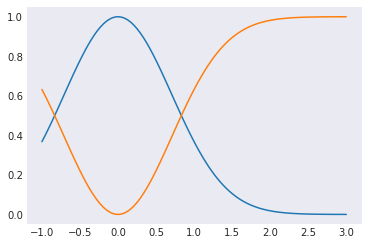

In [27]:
with plt.style.context('seaborn-dark'):
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))

Hay otro tipo de personalización más *particular* aun:

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


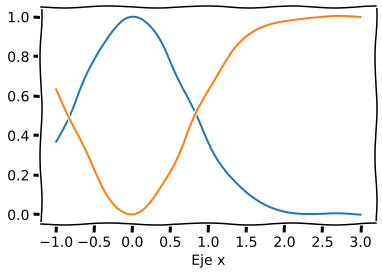

In [28]:
with plt.xkcd():
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))
    plt.xlabel("Eje x")

¡Nunca imitar a XKCD fue tan fácil! http://xkcd.com/353/

### Otro tipo de gráficos

La función `scatter` muestra una nube de puntos, con posibilidad de variar el tamaño y el color.

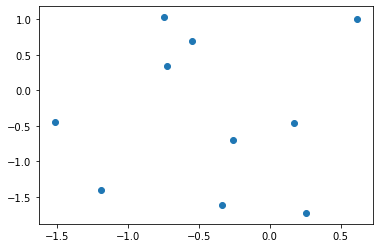

In [31]:
N = 10
x = np.random.randn(N)
y = np.random.randn(N)

plt.scatter(x, y)

Con `s` y `c` podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un *mapa de colores*; ese mapa se puede cambiar con el argumento `cmap`. Esa correspondencia se puede visualizar llamando a la función `colorbar`.

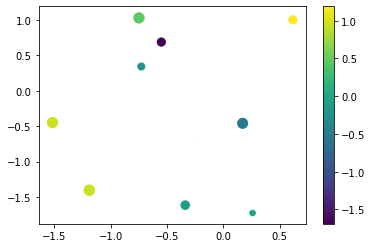

In [38]:
N = 10
s = np.abs(50 + 50 * np.random.randn(N))
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c)
plt.colorbar()

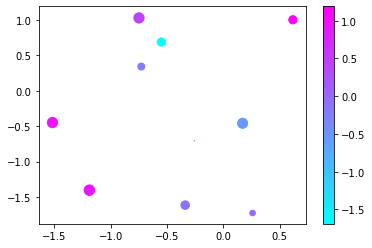

In [40]:
plt.scatter(x, y, s=s, c=c, cmap=plt.cm.cool)
plt.colorbar()

Matplotlib trae por defecto muchos mapas de colores. En las *SciPy Lecture Notes* dan una lista de todos ellos [matplotlib colormaps](http://scipy-lectures.org/intro/matplotlib/auto_examples/options/plot_colormaps.html#sphx-glr-download-intro-matplotlib-auto-examples-options-plot-colormaps-py)

![matplotlib colormaps](../images/plot_colormaps.png)

La función `contour` se utiliza para visualizar las curvas de nivel de funciones de dos variables y está muy ligada a la función `np.meshgrid`. Veamos un ejemplo:

$$f(x) = x^2 - y^2$$

In [41]:
def f(x, y):
    return x ** 2 - y ** 2

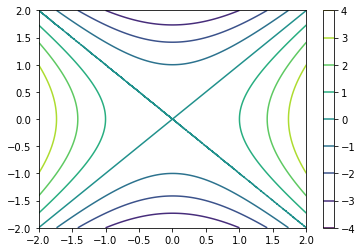

In [45]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
xx, yy = np.meshgrid(x, y)

zz = f(xx, yy)

plt.contour(xx, yy, zz)
plt.colorbar()

La función `contourf` es casi idéntica pero rellena el espacio entre niveles. Podemos especificar manualmente estos niveles usando el cuarto argumento:

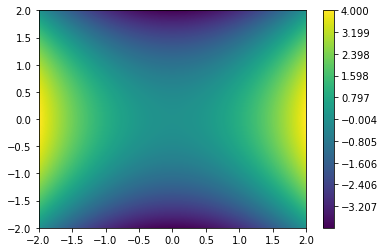

In [48]:
plt.contourf(xx, yy, zz, np.linspace(-4, 4, 100))
plt.colorbar()

Para guardar las gráficas en archivos aparte podemos usar la función `plt.savefig`. Matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos.

### Varias figuras

Podemos crear figuras con varios sistemas de ejes, pasando a `subplot` el número de filas y de columnas.

Text(0.5, 1.0, 'Función coseno')

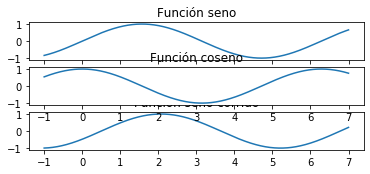

In [57]:
x = np.linspace(-1, 7, 1000)

untref_figura=plt.figure()
plt.subplot(5,1,1)
plt.plot(x, np.sin(x))
plt.grid(False)
plt.title("Función seno")

plt.subplot(5,1,3)
plt.plot(x, np.sin(x-0.5))
plt.grid(False)
plt.title("Función seno corrido")

plt.subplot(5,1,2)
plt.plot(x, np.cos(x))
plt.grid(False)
plt.title("Función coseno")



¿Cómo se ajusta el espacio entre gráficas para que no se solapen los textos? Buscamos en *Google* "plt.subplot adjust" y en el primer resultado tenemos la respuesta! [stack overflow](http://stackoverflow.com/a/9827848)

Como hemos guardado la figura en una variable, podemos recuperarla más adelante y seguir editándola.

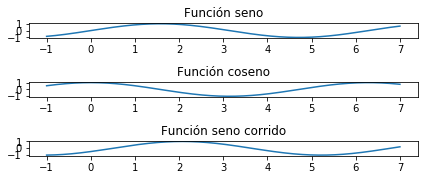

In [58]:
untref_figura.tight_layout()
untref_figura

**Ejercicio**

Crear una función que represente gráficamente esta expresión:

$$\sin(2 \pi f_1 t) + \sin(2 \pi f_2 t)$$

siendo $f_1$ y $f_2$ argumentos de entrada (por defecto $10$ y $100$) y $t \in [0, 0.5]$.

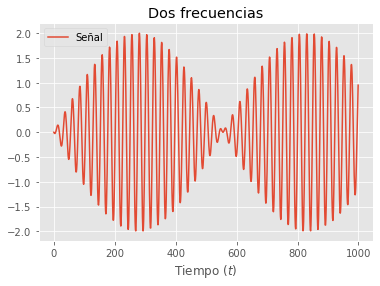

In [68]:
def frecuencias(f1=10.0, f2=100.0):
    max_time = 2
    times = np.linspace(0, max_time, 1000)
    signal = np.sin(2 * np.pi * f1 * times) - np.sin(2 * np.pi * f2 * times)
    with plt.style.context("ggplot"):
        plt.plot(signal, label="Señal")
        plt.xlabel("Tiempo ($t$)")
        plt.title("Dos frecuencias")
        plt.legend()

frecuencias(20.0,20.9)

**Ejercicio**

Representar las curvas de nivel de esta función:

$$g(x, y) = \cos{x} + \sin^2{y}$$

para obtener este resultado:

![Ejercicio](../images/ejercicio_contour.png)

Text(0.5, 1.0, 'Función $g(x, y) = \\dfrac{\\cos{x}}{\\sin^2{y}}$')

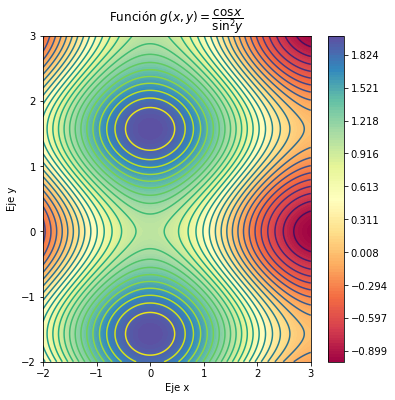

In [77]:
def g(x, y):
    return np.cos(x) + np.sin(y) ** 2

# Necesitamos muchos puntos en la malla, para que cuando se
# crucen las líneas no se vean irregularidades
x = np.linspace(-2, 3, 1000)
y = np.linspace(-2, 3, 1000)

xx, yy = np.meshgrid(x, y)

zz = g(xx, yy)

# Podemos ajustar el tamaño de la figura con figsize
fig = plt.figure(figsize=(6, 6))

# Ajustamos para que tenga 13 niveles y que use el colormap Spectral
# Tenemos que asignar la salida a la variable cs para luego crear el colorbar
cs = plt.contourf(xx, yy, zz, np.linspace(-1, 2, 120), cmap=plt.cm.Spectral)

# Creamos la barra de colores
plt.colorbar()

# Con `colors='k'` dibujamos todas las líneas negras
# Asignamos la salida a la variable cs2 para crear las etiquetas
cs = plt.contour(xx, yy, zz, np.linspace(-1, 2, 30))

# Creamos las etiquetas sobre las líneas
#plt.clabel(cs)

# Ponemos las etiquetas de los ejes
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title(r"Función $g(x, y) = \dfrac{\cos{x}}{\sin^2{y}}$")

## Referencias

* Guía de matplotlib para principiantes http://matplotlib.org/users/beginner.html
* Referencia rápida de matplotlib https://scipy-lectures.org/intro/matplotlib/index.html

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())